In [1]:
# In your 4.1.2_distributions_and_clt.ipynb notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set a consistent style for plots
sns.set_theme(style="whitegrid")

### **1. Common Probability Distributions**
We will focus on the conceptual understanding and visualization of these key distributions.
- **The Normal Distribution (Gaussian Distribution)**
    - The most important distribution in statistics. It's the famous "bell curve."
    - **Characteristics:** Symmetric, bell-shaped, defined by its mean (μ) and standard deviation (σ).
    - **Real-world examples:** Heights of people, blood pressure, measurement errors, IQ scores.
    - The Empirical Rule (for normal distributions):
        - ~68% of data falls within 1 standard deviation of the mean.
        - ~95% of data falls within 2 standard deviations.
        - ~99.7% of data falls within 3 standard deviations.

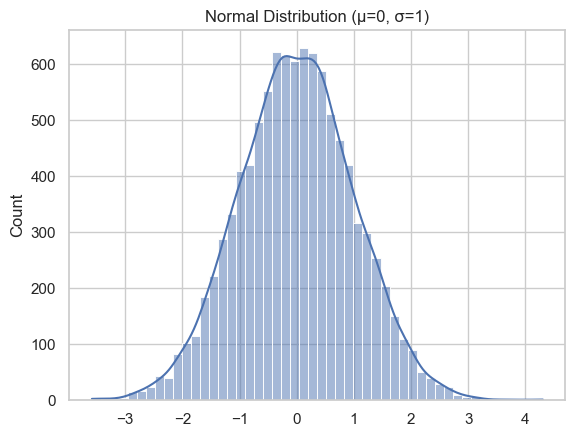

In [2]:
# Generate data from a normal distribution
# loc = mean, scale = standard deviation, size = number of points
normal_data = stats.norm.rvs(loc=0, scale=1, size=10000)

# Visualize it
sns.histplot(normal_data, kde=True, bins=50)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.show()

- **The Binomial Distribution**
    - Describes the outcome of a fixed number of independent trials, where each trial has only two possible outcomes (e.g., success/failure, heads/tails, survived/died).
    - **Parameters:**
        - n: The number of trials.
        - p: The probability of success on a single trial.
    - **Example:** If we flip a fair coin 10 times (n=10, p=0.5), how many heads will we get? The binomial distribution gives us the probability for each possible number of heads (0, 1, ..., 10).

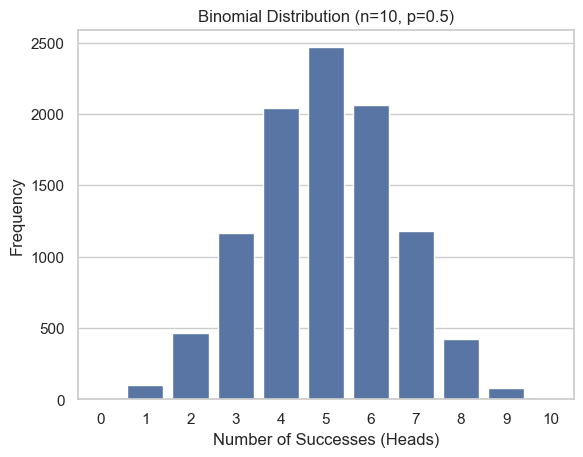

In [3]:
# Generate data from a binomial distribution
# n = number of trials, p = probability of success, size = number of experiments
# Let's simulate flipping 10 coins, 10,000 times
binomial_data = stats.binom.rvs(n=10, p=0.5, size=10000)

# Visualize it
sns.countplot(x=binomial_data)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes (Heads)")
plt.ylabel("Frequency")
plt.show()

- **The Poisson Distribution**
    - Describes the number of times an event occurs in a fixed interval of time or space, given the average rate of occurrence.
    - **Parameter:**
    mu (λ): The average number of events per interval.
    - **Example:** If a call center receives an average of 10 calls per hour (mu=10), what is the probability of receiving 5 calls, 12 calls, or 20 calls in the next hour?

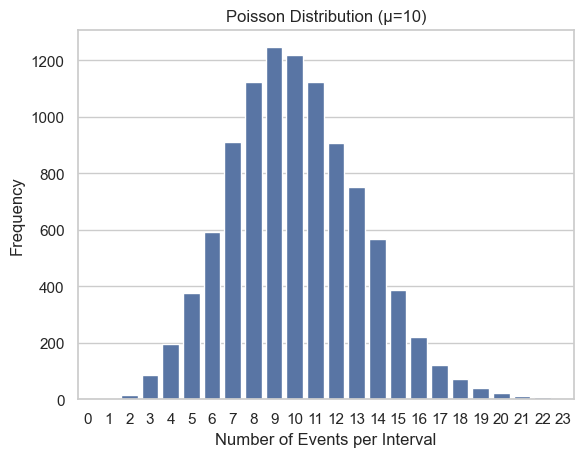

In [4]:
# Generate data from a Poisson distribution
# mu = average rate, size = number of intervals to simulate
# Simulate a process with an average of 10 events per interval
poisson_data = stats.poisson.rvs(mu=10, size=10000)

# Visualize it
sns.countplot(x=poisson_data)
plt.title("Poisson Distribution (μ=10)")
plt.xlabel("Number of Events per Interval")
plt.ylabel("Frequency")
plt.show()

- **The Uniform Distribution**
    - All outcomes in a given range are equally likely.
    - It's a "flat" distribution.
    - **Example:** Rolling a single fair die. The probability of getting a 1, 2, 3, 4, 5, or 6 is equal (1/6).

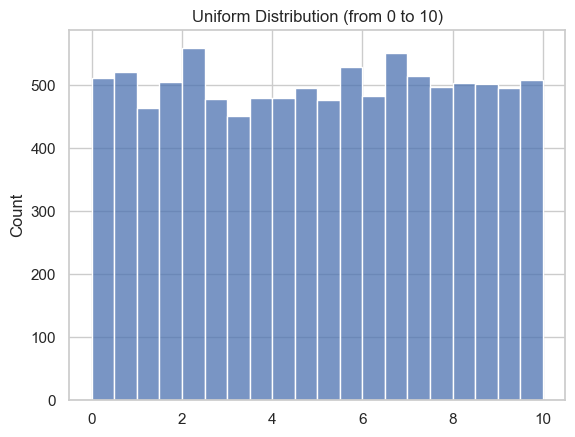

In [5]:
# Generate data from a uniform distribution
# loc = start of range, scale = width of range
uniform_data = stats.uniform.rvs(loc=0, scale=10, size=10000)

# Visualize it
sns.histplot(uniform_data, bins=20)
plt.title("Uniform Distribution (from 0 to 10)")
plt.show()

### **2. The Central Limit Theorem (CLT)**
This is one of the most profound and important theorems in statistics.
- **The Theorem (in simple terms):** If you take a sufficiently large number of random samples from any population (regardless of the population's original distribution) and calculate the mean of each sample, the distribution of those sample means will be approximately normally distributed.
- **Why is this amazing?** It means we can use the properties of the normal distribution to make inferences about a population, even if we have no idea what the population's distribution looks like! This is the foundation of most hypothesis testing.

**In simple language**
**📊 Central Limit Theorem (CLT)**

## 🧠 What is the Central Limit Theorem?

Imagine you have a **big jar of mixed candies** — some are small, some are big, and they come in all shapes and flavors. The candy **sizes are random** and not evenly distributed.  
This jar represents your **population**.

Now, let’s say you:
1. **Scoop out 30 candies** at random (this is your **sample**).
2. **Measure the average size** of those 30 candies.
3. Put them back, mix again, and take **another scoop of 30**, and find the average size again.
4. Repeat this many times — say, **1000 times**!

You’ll end up with **1000 average sizes** from your scoops.

---

## 🎯 What CLT Says

No matter **how random or weird** the candy sizes are in the jar (population):

- ✅ If you take **enough random samples** and calculate their **averages**,
- ✅ The **distribution of those averages** will form a nice, **bell-shaped curve** — called a **normal distribution**.

---

## 🤯 Why is This Amazing?

- Even if the original data is **not normal** (not bell-shaped),
- The **averages of samples** will be **approximately normally distributed**,  
- As long as the sample size is **large enough** (usually **n ≥ 30** is sufficient).

---

## ✅ Why It's Useful

Thanks to CLT, we can:

- 📐 Estimate things about an entire population,
- 🧪 Perform **hypothesis testing**,
- 📊 Make **predictions** using only **sample data**,
- Even when the **population distribution is unknown or messy**.

---

## 🔁 In Short

> **“Take enough random samples from anything (no matter how messy), and their averages will behave nicely like a bell curve.”**

This makes **statistics work**, even when the real world isn’t perfect!

---



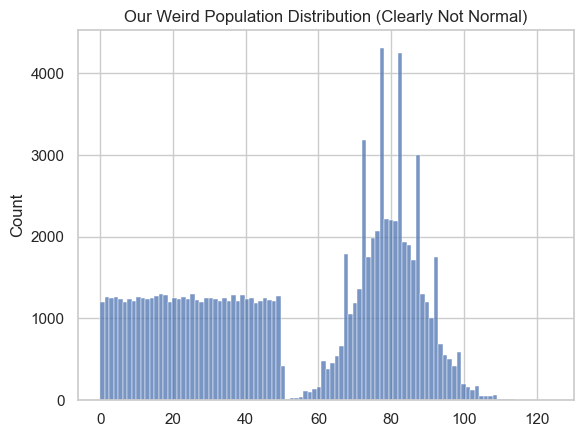

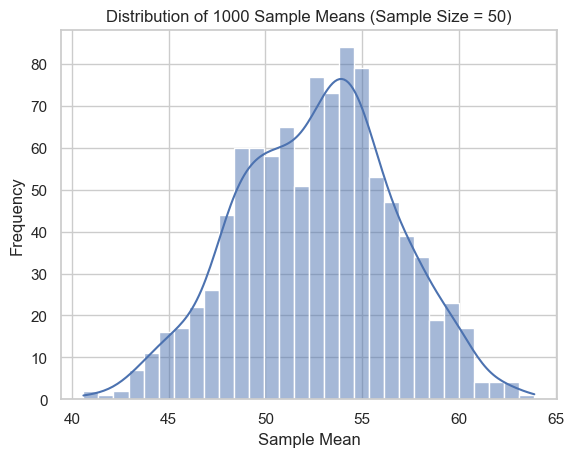

In [6]:
# 1. Create a "weird" population. Let's combine two distributions.
population1 = stats.uniform.rvs(loc=0, scale=50, size=50000)
population2 = stats.poisson.rvs(mu=80, size=50000)
population = np.concatenate([population1, population2])

# Visualize our weird population distribution
sns.histplot(population, bins=100)
plt.title("Our Weird Population Distribution (Clearly Not Normal)")
plt.show()

# 2. Repeatedly take samples and calculate their means
sample_size = 50
number_of_samples = 1000
sample_means = []

for i in range(number_of_samples):
    # Take a random sample from the population
    sample = np.random.choice(population, size=sample_size)
    # Calculate the mean of that sample and store it
    sample_means.append(sample.mean())

# 3. Visualize the distribution of the sample means
sns.histplot(sample_means, kde=True, bins=30)
plt.title(f"Distribution of {number_of_samples} Sample Means (Sample Size = {sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()
# The result will be a beautiful, symmetric, normal-looking distribution!

### **Exercises**

**1. Distribution Identification:**
For each of the following scenarios, identify which probability distribution (Normal, Binomial, Poisson, or Uniform) is most likely to model the situation and briefly explain why.
- a) The height of adult males in a city.
- b) The number of defective light bulbs in a batch of 100, where the probability of a single bulb being defective is 2%.
- c) The number of emails you receive in an hour.
- d) The outcome of picking a random number between 1 and 100.

**a) The height of adult males in a city**
- **📊 Distribution:** **Normal Distribution**
- **🧠 Why:** Human heights usually follow a bell-shaped curve, with most people near the average and fewer at the extremes. This is characteristic of a normal distribution.

---

**b) The number of defective light bulbs in a batch of 100, where the probability of a single bulb being defective is 2%**
- **📊 Distribution:** **Binomial Distribution**
- **🧠 Why:** You're performing a fixed number of independent trials (100 bulbs), each with a small and constant probability of success (defect). This fits the binomial model.

---

**c) The number of emails you receive in an hour**
- **📊 Distribution:** **Poisson Distribution**
- **🧠 Why:** You're counting how many events (emails) happen in a fixed time period (1 hour). These types of rare and independent events fit a Poisson distribution well.

---

**d) The outcome of picking a random number between 1 and 100**
- **📊 Distribution:** **Uniform Distribution**
- **🧠 Why:** Each number between 1 and 100 has an equal chance of being selected, which is the definition of a uniform distribution.

---

**2. Binomial Distribution Simulation:**
- A basketball player has a 70% chance of making a free throw (p=0.7). They are about to shoot 15 free throws (n=15).
- Use stats.binom.rvs() to simulate this experiment 10,000 times. This will give you an array where each number represents the count of made shots in a set of 15 throws.
- Create a countplot to visualize the distribution of the results.
- Use your simulated data to calculate the probability that the player makes exactly 10 free throws. (Hint: Find how many times 10 appears in your results and divide by the total number of simulations).
. Use your simulated data to calculate the probability that the player makes 12 or more free throws.

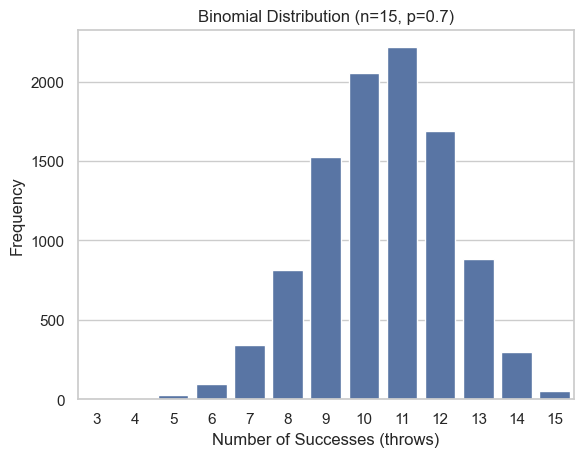

Probability of exactly 10 successful throws: 0.2052
Probability of 12 or more successful throws: 0.2915


In [5]:
n= 15
p=0.7
size= 10000
data= stats.binom.rvs(n=n, p=p, size =size)
fig, ax = plt.subplots()
sns.countplot(x= data, ax=ax)
ax.set_title("Binomial Distribution (n=15, p=0.7)")
ax.set_xlabel("Number of Successes (throws)")
ax.set_ylabel("Frequency")
plt.show()

# Probability of exactly 10 successful throws
prob_exact_10 = (data == 10).sum() / size

# Probability of 12 or more successful throws
prob_12_or_more = (data >= 12).sum() / size

print(f"Probability of exactly 10 successful throws: {prob_exact_10:.4f}")
print(f"Probability of 12 or more successful throws: {prob_12_or_more:.4f}")

**3. CLT in Action:**
- Create a population of 100,000 numbers drawn from a right-skewed distribution. The Chi-Squared distribution is a good choice for this (stats.chi2.rvs(df=3, size=100000) where df is "degrees of freedom").
- Visualize the population's distribution with a histogram to confirm it's skewed.
- Write a loop that takes 2,000 samples of size 5 from the population. For each sample, calculate the mean and store it.
- Plot a histogram of these 2,000 sample means. Is it skewed or does it look normal?
- Now, repeat the process, but this time take 2,000 samples of size 100.
- Plot a histogram of these new sample means.
- In a Markdown cell, compare the two histograms of the sample means. What does this demonstrate about the Central Limit Theorem and the effect of sample size?

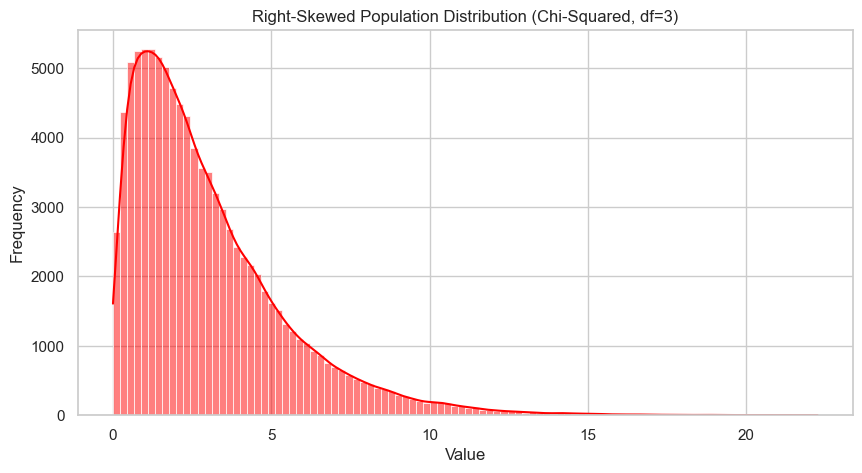

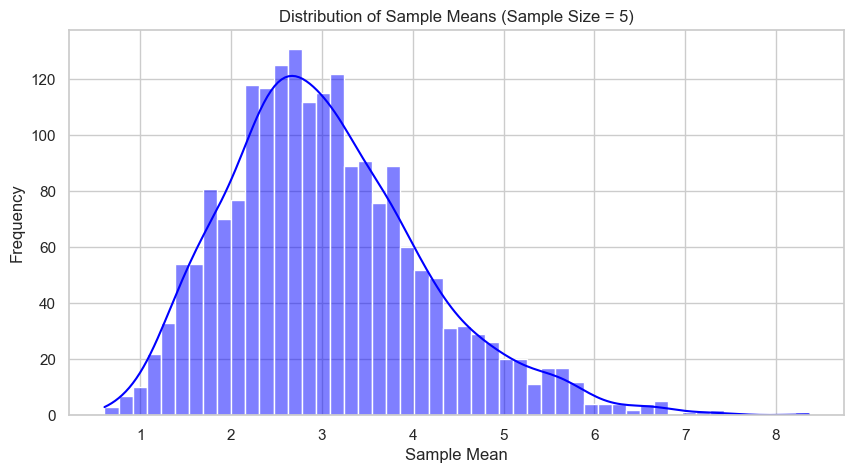

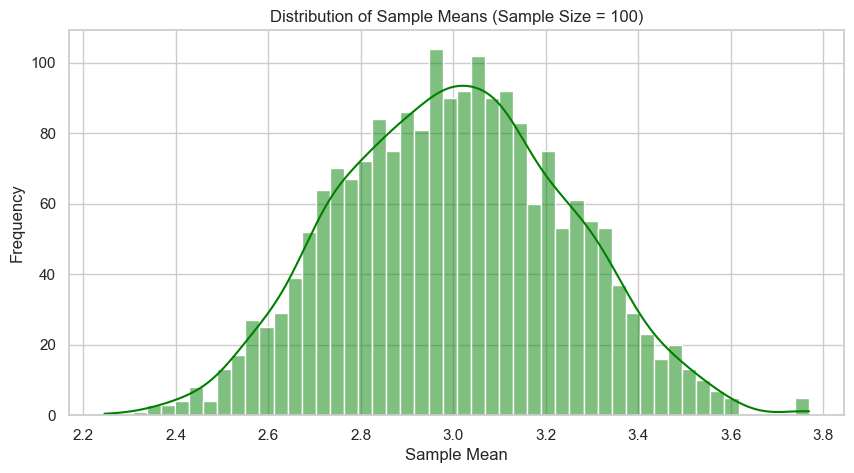

In [6]:
population = stats.chi2.rvs(df=3, size=100000)

plt.figure(figsize=(10, 5))
sns.histplot(population, bins=100, kde=True, color='red')
plt.title("Right-Skewed Population Distribution (Chi-Squared, df=3)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sample_means_5 = []
for value in range(2000):
    sample = np.random.choice(population, size=5)
    sample_means_5.append(np.mean(sample))

plt.figure(figsize=(10, 5))
sns.histplot(sample_means_5, bins=50, kde=True, color='blue')
plt.title("Distribution of Sample Means (Sample Size = 5)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sample_means_100 = []
for value in range(2000):
    sample = np.random.choice(population, size=100)
    sample_means_100.append(np.mean(sample))

plt.figure(figsize=(10, 5))
sns.histplot(sample_means_100, bins=50, kde=True, color='green')
plt.title("Distribution of Sample Means (Sample Size = 100)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


📊 CLT in Action: Chi-Squared Distribution
**🔍 Step-by-Step Observations:**

**1️⃣ Population Histogram**
- The original population histogram shows a **strong right-skew** (long tail on the right).
- This confirms the data is **not normally distributed**.

**2️⃣ Sample Means (Sample Size = 5)**
- We drew 2,000 random samples, each of size 5, and calculated their means.
- The histogram of these sample means still shows **some skewness**, but it's **less skewed than the original population**.
- It’s starting to resemble a normal distribution.

**3️⃣ Sample Means (Sample Size = 100)**
- We repeated the process using a larger sample size of 100.
- The histogram of these sample means is **very close to a normal distribution** (bell-shaped and symmetric).

This experiment **visually proves** the **Central Limit Theorem (CLT)**:

> As the sample size increases, the distribution of the sample means becomes **more normally distributed**, **regardless of the shape** of the original population.

- Smaller sample sizes (like 5) lead to more variation and slight skewness.
- Larger sample sizes (like 100) **smooth out** the randomness and follow the normal distribution.

📌 **Conclusion:** The CLT shows that we can use the normal distribution to make predictions about sample means — even when the population is not normal — as long as the sample size is large enough.